# HR Employee Records
### Problem Statement:
    Process employee data for inconsistencies, fill missing ratings, compute average salaries by department, and identify low-performing departments.
    Key Functions: .pivot_table(), .nunique(), .clip(), .qcut(), np.percentile(), .dt.year, .value_counts()

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('hr_employees.csv')
df = df.copy()
df

,Emp_ID,Name,Department,Join_Date,Salary,Performance_Rating
0,6001,Alice,Marketing,2022-01-01,40000.0,3.0
1,6002,Bob,Finance,2022-01-08,25000.0,NaN
2,6003,Charlie,NaN,2022-01-15,40000.0,4.0
3,6004,Charlie,Marketing,2022-01-22,NaN,NaN
4,6005,Frank,Admin,2022-01-29,NaN,5.0
5,6006,Charlie,HR,2022-02-05,30000.0,4.0
6,6007,Frank,Finance,2022-02-12,40000.0,5.0
7,6008,David,HR,2022-02-19,40000.0,NaN
8,6009,Frank,Admin,2022-02-26,50000.0,2.0
9,6010,Bob,Admin,2022-03-05,30000.0,3.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Emp_ID              50 non-null     int64  
 1   Name                50 non-null     object 
 2   Department          41 non-null     object 
 3   Join_Date           50 non-null     object 
 4   Salary              42 non-null     float64
 5   Performance_Rating  41 non-null     float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.5+ KB


In [5]:
df.isnull().sum()

Emp_ID                0
Name                  0
Department            9
Join_Date             0
Salary                8
Performance_Rating    9
dtype: int64

In [6]:
df['Department'] = df['Department'].ffill()

In [7]:
df

,Emp_ID,Name,Department,Join_Date,Salary,Performance_Rating
0,6001,Alice,Marketing,2022-01-01,40000.0,3.0
1,6002,Bob,Finance,2022-01-08,25000.0,NaN
2,6003,Charlie,Finance,2022-01-15,40000.0,4.0
3,6004,Charlie,Marketing,2022-01-22,NaN,NaN
4,6005,Frank,Admin,2022-01-29,NaN,5.0
5,6006,Charlie,HR,2022-02-05,30000.0,4.0
6,6007,Frank,Finance,2022-02-12,40000.0,5.0
7,6008,David,HR,2022-02-19,40000.0,NaN
8,6009,Frank,Admin,2022-02-26,50000.0,2.0
9,6010,Bob,Admin,2022-03-05,30000.0,3.0


In [8]:
df.isnull().sum()

Emp_ID                0
Name                  0
Department            0
Join_Date             0
Salary                8
Performance_Rating    9
dtype: int64

In [9]:
df.fillna({'Salary':df['Salary'].mean().round()}, inplace=True)

In [10]:
df

,Emp_ID,Name,Department,Join_Date,Salary,Performance_Rating
0,6001,Alice,Marketing,2022-01-01,40000.0,3.0
1,6002,Bob,Finance,2022-01-08,25000.0,NaN
2,6003,Charlie,Finance,2022-01-15,40000.0,4.0
3,6004,Charlie,Marketing,2022-01-22,38095.0,NaN
4,6005,Frank,Admin,2022-01-29,38095.0,5.0
5,6006,Charlie,HR,2022-02-05,30000.0,4.0
6,6007,Frank,Finance,2022-02-12,40000.0,5.0
7,6008,David,HR,2022-02-19,40000.0,NaN
8,6009,Frank,Admin,2022-02-26,50000.0,2.0
9,6010,Bob,Admin,2022-03-05,30000.0,3.0


In [11]:
df['Performance_Rating'].value_counts()

Performance_Rating
3.0    11
5.0    11
4.0    10
1.0     6
2.0     3
Name: count, dtype: int64

In [12]:
df.fillna({'Performance_Rating':5}, inplace = True)

In [13]:
df['Performance_Rating'] = df['Performance_Rating'].astype(int)

In [14]:
df

,Emp_ID,Name,Department,Join_Date,Salary,Performance_Rating
0,6001,Alice,Marketing,2022-01-01,40000.0,3
1,6002,Bob,Finance,2022-01-08,25000.0,5
2,6003,Charlie,Finance,2022-01-15,40000.0,4
3,6004,Charlie,Marketing,2022-01-22,38095.0,5
4,6005,Frank,Admin,2022-01-29,38095.0,5
5,6006,Charlie,HR,2022-02-05,30000.0,4
6,6007,Frank,Finance,2022-02-12,40000.0,5
7,6008,David,HR,2022-02-19,40000.0,5
8,6009,Frank,Admin,2022-02-26,50000.0,2
9,6010,Bob,Admin,2022-03-05,30000.0,3


In [15]:
df.isnull().sum()

Emp_ID                0
Name                  0
Department            0
Join_Date             0
Salary                0
Performance_Rating    0
dtype: int64

In [16]:
df.to_csv('cleaned_employee_data.csv', index = False)

# INSIGHTS

## You are a data analyst in the HR department. The team needs insights into employee performance, salary structure, and departmental distribution.

In [4]:
df_new = pd.read_csv('cleaned_employee_data.csv')
df = df_new.copy()
df

,Emp_ID,Name,Department,Join_Date,Salary,Performance_Rating
0,6001,Alice,Marketing,2022-01-01,40000.0,3
1,6002,Bob,Finance,2022-01-08,25000.0,5
2,6003,Charlie,Finance,2022-01-15,40000.0,4
3,6004,Charlie,Marketing,2022-01-22,38095.0,5
4,6005,Frank,Admin,2022-01-29,38095.0,5
5,6006,Charlie,HR,2022-02-05,30000.0,4
6,6007,Frank,Finance,2022-02-12,40000.0,5
7,6008,David,HR,2022-02-19,40000.0,5
8,6009,Frank,Admin,2022-02-26,50000.0,2
9,6010,Bob,Admin,2022-03-05,30000.0,3


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Emp_ID              50 non-null     int64  
 1   Name                50 non-null     object 
 2   Department          50 non-null     object 
 3   Join_Date           50 non-null     object 
 4   Salary              50 non-null     float64
 5   Performance_Rating  50 non-null     int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 2.5+ KB


In [5]:
df.describe()

,Emp_ID,Salary,Performance_Rating
count,50.00000,50.000000,50.000000
mean,6025.50000,38095.200000,3.700000
std,14.57738,8627.931679,1.373956
min,6001.00000,25000.000000,1.000000
25%,6013.25000,30000.000000,3.000000
50%,6025.50000,40000.000000,4.000000
75%,6037.75000,40000.000000,5.000000
max,6050.00000,50000.000000,5.000000


### 1. Data Selection & Filtering:
    Extract employees from the Finance and Marketing departments with a performance rating of 4 or above.

In [36]:
df.query("Performance_Rating >= 4 and Department in ['Finance','Marketing']")

,Emp_ID,Name,Department,Join_Date,Salary,Performance_Rating
1,6002,Bob,Finance,2022-01-08,25000.0,5
2,6003,Charlie,Finance,2022-01-15,40000.0,4
3,6004,Charlie,Marketing,2022-01-22,38095.0,5
6,6007,Frank,Finance,2022-02-12,40000.0,5
11,6012,Frank,Finance,2022-03-19,50000.0,5
15,6016,Eva,Marketing,2022-04-16,25000.0,5
18,6019,Frank,Marketing,2022-05-07,50000.0,4
23,6024,Charlie,Finance,2022-06-11,40000.0,5
32,6033,David,Marketing,2022-08-13,50000.0,4
34,6035,David,Finance,2022-08-27,50000.0,5


### 2. Data Cleaning & Preprocessing:
1. Standardize inconsistent department naming (e.g., "finance" vs "Finance").
2. Convert Join_Date to datetime format.

In [40]:
df['Join_Date'] = pd.to_datetime(df['Join_Date'])

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Emp_ID              50 non-null     int64         
 1   Name                50 non-null     object        
 2   Department          50 non-null     object        
 3   Join_Date           50 non-null     datetime64[ns]
 4   Salary              50 non-null     float64       
 5   Performance_Rating  50 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 2.5+ KB


### 3. Data Transformation:
1. Calculate Years_of_Service from Join_Date to the current date.
2. Create a new column Performance_Category using rating (1-2: Low, 3: Average, 4-5: High).

In [42]:
df.head()

,Emp_ID,Name,Department,Join_Date,Salary,Performance_Rating
0,6001,Alice,Marketing,2022-01-01,40000.0,3
1,6002,Bob,Finance,2022-01-08,25000.0,5
2,6003,Charlie,Finance,2022-01-15,40000.0,4
3,6004,Charlie,Marketing,2022-01-22,38095.0,5
4,6005,Frank,Admin,2022-01-29,38095.0,5


In [69]:
# Calculate Years_of_Service from Join_Date to the current date.
current_date = pd.to_datetime("today")
df['Years_of_Experience'] = (current_date - df['Join_Date']).dt.days // 365

In [70]:
df.head(10)

,Emp_ID,Name,Department,Join_Date,Salary,Performance_Rating,Years_of_Experience
0,6001,Alice,Marketing,2022-01-01,40000.0,3,3
1,6002,Bob,Finance,2022-01-08,25000.0,5,3
2,6003,Charlie,Finance,2022-01-15,40000.0,4,3
3,6004,Charlie,Marketing,2022-01-22,38095.0,5,3
4,6005,Frank,Admin,2022-01-29,38095.0,5,3
5,6006,Charlie,HR,2022-02-05,30000.0,4,3
6,6007,Frank,Finance,2022-02-12,40000.0,5,3
7,6008,David,HR,2022-02-19,40000.0,5,3
8,6009,Frank,Admin,2022-02-26,50000.0,2,3
9,6010,Bob,Admin,2022-03-05,30000.0,3,3


In [5]:
# Create a new column Performance_Category using rating (1-2: Low, 3: Average, 4-5: High).
df['Performance_Category'] = np.where(
    df['Performance_Rating'] <= 2, 'Low',
    np.where(df['Performance_Rating'] == 3, 'Average','High')
)

In [76]:
df

,Emp_ID,Name,Department,Join_Date,Salary,Performance_Rating,Years_of_Experience,Performance_Category
0,6001,Alice,Marketing,2022-01-01,40000.0,3,3,Average
1,6002,Bob,Finance,2022-01-08,25000.0,5,3,High
2,6003,Charlie,Finance,2022-01-15,40000.0,4,3,High
3,6004,Charlie,Marketing,2022-01-22,38095.0,5,3,High
4,6005,Frank,Admin,2022-01-29,38095.0,5,3,High
5,6006,Charlie,HR,2022-02-05,30000.0,4,3,High
6,6007,Frank,Finance,2022-02-12,40000.0,5,3,High
7,6008,David,HR,2022-02-19,40000.0,5,3,High
8,6009,Frank,Admin,2022-02-26,50000.0,2,3,Low
9,6010,Bob,Admin,2022-03-05,30000.0,3,3,Average


### 4. Melt & Pivot:
    1. Melt the dataset to compare salaries and performance ratings in a long format.
    2. Pivot to show average salary by Department and Performance_Category.

In [36]:
# Melt the dataset to compare salaries and performance ratings in a long format.
melted_df = df.melt(id_vars=["Emp_ID"], value_vars=["Department", "Performance_Rating", "Salary"], var_name="Categories", value_name="Values")

In [37]:
melted_df

,Emp_ID,Categories,Values
0,6001,Department,Marketing
1,6002,Department,Finance
2,6003,Department,Finance
3,6004,Department,Marketing
4,6005,Department,Admin
...,...,...,...
145,6046,Salary,30000.0
146,6047,Salary,38095.0
147,6048,Salary,50000.0
148,6049,Salary,25000.0


In [38]:
melted_df.sort_values(by='Emp_ID').reset_index(drop=True)

,Emp_ID,Categories,Values
0,6001,Department,Marketing
1,6001,Performance_Rating,3
2,6001,Salary,40000.0
3,6002,Performance_Rating,5
4,6002,Salary,25000.0
...,...,...,...
145,6049,Performance_Rating,2
146,6049,Department,Marketing
147,6050,Department,Marketing
148,6050,Performance_Rating,5


In [86]:
# Pivot to show average salary by Department and Performance_Category.
df.pivot_table(index="Department", columns="Performance_Category", values="Salary", aggfunc="mean")

Performance_Category,Average,High,Low
Department,,,
Admin,40000.0,35238.000000,40773.75
Finance,34365.0,39232.777778,34047.50
HR,40000.0,33000.000000,NaN
Marketing,40000.0,40619.000000,34365.00
Tech,40000.0,41666.666667,NaN


In [85]:
df.pivot_table(index="Department", columns="Performance_Rating", values="Salary", aggfunc="mean")

Performance_Rating,1,2,3,4,5
Department,,,,,
Admin,37698.333333,50000.0,40000.0,44047.5,29365.000000
Finance,30000.000000,38095.0,34365.0,39365.0,39166.666667
HR,NaN,NaN,40000.0,27500.0,36666.666667
Marketing,39047.500000,25000.0,40000.0,50000.0,34365.000000
Tech,NaN,NaN,40000.0,30000.0,44000.000000


### 5. Aggregation & Grouping:
    1. Find average, max, and min salary per department.
    2. Count of employees per Performance_Category.

In [104]:
# Find average, max, and min salary per department.
df.groupby("Department")["Salary"].mean().round()

Department
Admin        38117.0
Finance      37449.0
HR           35000.0
Marketing    38466.0
Tech         41111.0
Name: Salary, dtype: float64

In [97]:
# Find average, max, and min salary per department.
df.groupby("Department")["Salary"].max()

Department
Admin        50000.0
Finance      50000.0
HR           50000.0
Marketing    50000.0
Tech         50000.0
Name: Salary, dtype: float64

In [98]:
# Find average, max, and min salary per department.
df.groupby("Department")["Salary"].min()

Department
Admin        25000.0
Finance      25000.0
HR           25000.0
Marketing    25000.0
Tech         30000.0
Name: Salary, dtype: float64

In [99]:
# Count of employees per Performance_Category
df.groupby("Performance_Category")['Emp_ID'].count()

Performance_Category
Average    11
High       30
Low         9
Name: Emp_ID, dtype: int64

### 6. Merging & Joining:
Create a mock DataFrame for department headcounts and merge it with your aggregated salary data.

In [110]:
department_headcounts = df['Department'].value_counts()

In [111]:
avg_dept_salary = df.groupby("Department")["Salary"].mean().round()

In [113]:
pd.merge(department_headcounts,avg_dept_salary, on="Department")

,count,Salary
Department,,
Finance,14,37449.0
Admin,11,38117.0
Marketing,9,38466.0
Tech,9,41111.0
HR,7,35000.0


# Data Visualization

### Objective:
    Gain insights into employee distribution, salary trends, and performance patterns.
### Visualization Tasks:
    1. Bar plot of employee count by Department.
    2. Boxplot of Salary across Departments to compare distributions.
    3. Line plot of average salary over join dates to see hiring trends.
    4. Countplot of Performance_Rating.
    5. Heatmap of correlation between numeric features (Salary, Performance_Rating).
    6. Pie chart showing the proportion of high/medium/low performers.

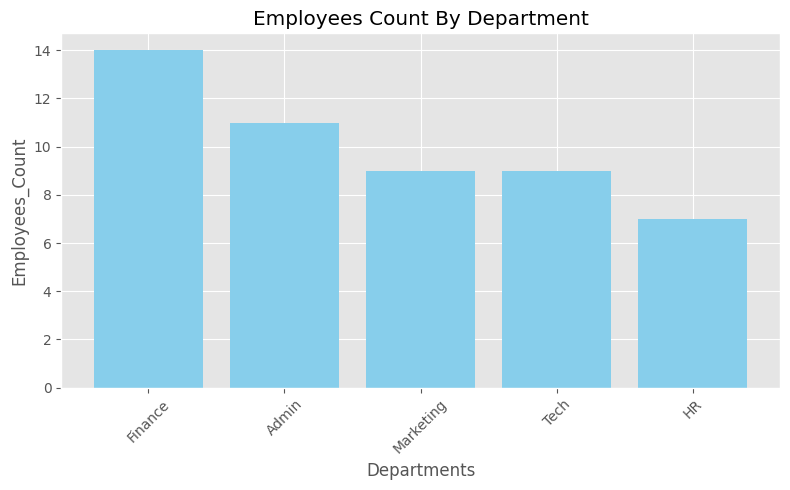

In [44]:
# Bar plot of employee count by Department.

department_headcounts = df['Department'].value_counts()
plt.figure(figsize=(8, 5))
plt.bar(department_headcounts.index,department_headcounts.values, color='skyblue')

plt.style.use("ggplot")

plt.xlabel("Departments")
plt.ylabel("Employees_Count")
plt.title("Employees Count By Department")
plt.xticks(rotation=45)
plt.tight_layout()

### 1. The Finance department has the highest number of employees with 14 staff members, indicating strong focus on financial operations.
### 2. The Admin department ranks second with 11 employees, showing emphasis on administrative support.
### 3. Marketing and Tech departments each have 9 employees, reflecting balanced roles in the organization.
### 4. The HR department has the fewest employees with 7 staff members, suggesting a lean or efficient HR structure.
### 5. Overall, staffing trends highlight a focus on internal operations (Finance & Admin: 25 employees) over external expansion (Marketing & Tech: 18 employees).

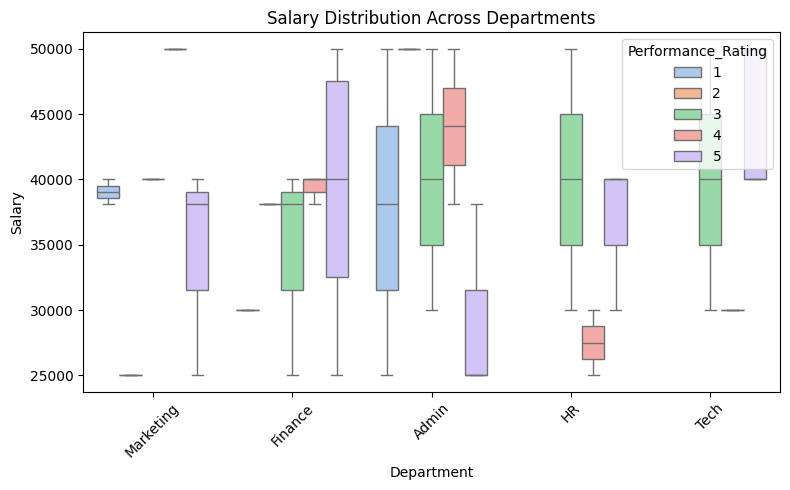

In [27]:
# Boxplot of Salary across Departments to compare distributions.

plt.figure(figsize=(8, 5))
sns.boxplot(x='Department', y='Salary', hue='Performance_Rating', data=df, palette='pastel')

plt.xlabel("Department")
plt.ylabel("Salary")
plt.title("Salary Distribution Across Departments")
plt.xticks(rotation=45)
plt.tight_layout()


### 1. Marketing salaries are narrowly distributed between ₹38,000–₹40,000, showing minimal variation and low influence of performance ratings on pay.
### 2. Finance department has a wide salary range from ₹30,000 to ₹50,000, reflecting significant variation likely based on performance (ratings 2 to 5) and roles.
### 3. Admin shows the highest salary variability with pay spanning from ₹25,000 to ₹50,000, and includes all performance ratings (1 to 5), indicating a diverse role and performance structure.
### 4. HR salaries range from ₹25,000 to ₹45,000, with a relatively lower median and tighter distribution, suggesting a more standardized salary structure.
### 5. Tech salaries range from ₹30,000 to ₹50,000, with higher ratings (4 and 5) tied to higher salaries, showing a strong correlation between performance and compensation.
### 6. In departments like Tech and Admin, higher performance ratings correspond to higher salaries, whereas in Marketing, salary remains mostly unaffected by performance rating.

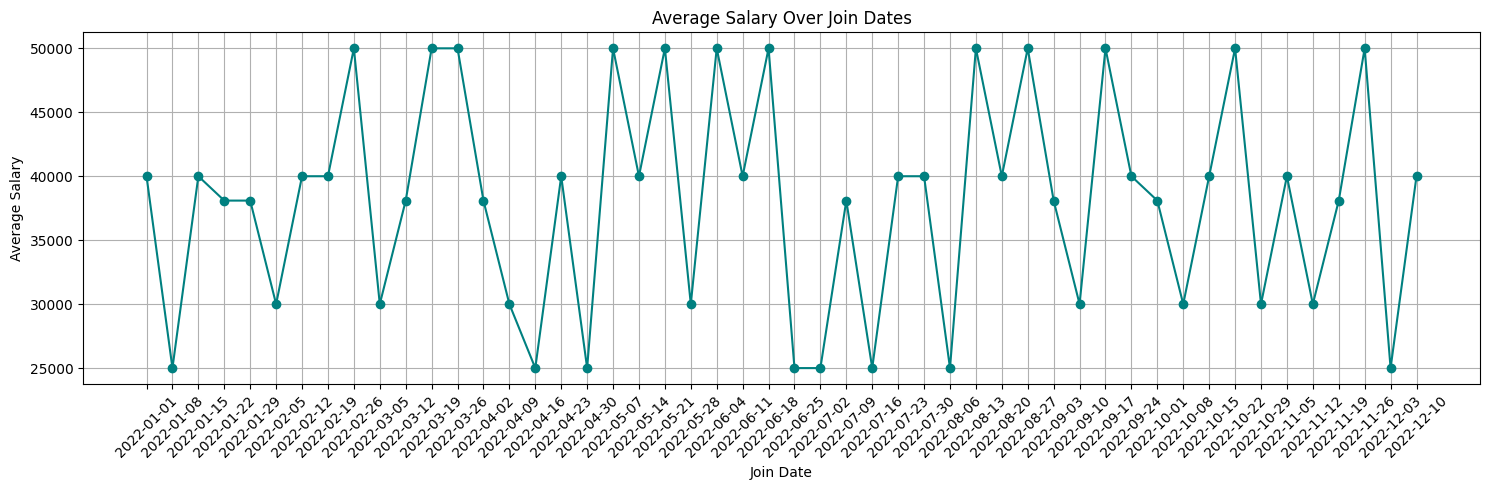

In [30]:
# Line plot of average salary over join dates to see hiring trends.
avg_salary_by_date = df.groupby('Join_Date')['Salary'].mean().reset_index()

plt.figure(figsize=(15, 5))
plt.plot(avg_salary_by_date['Join_Date'], avg_salary_by_date['Salary'], marker='o', linestyle='-', color='teal')

plt.xlabel("Join Date")
plt.ylabel("Average Salary")
plt.title("Average Salary Over Join Dates")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

## 1. High Variability in Salaries
### Average salaries fluctuate significantly between ₹25,000 and ₹50,000 across join dates, showing no stable trend.

## 2. Salary Peaks at ₹50,000
### Multiple join dates such as 2021-02-05, 2021-03-03, 2021-05-31, 2022-02-18, and 2022-09-16 reached the maximum average salary of ₹50,000.

## 3. Salary Dips to ₹25,000
### Lowest average salaries of ₹25,000 occurred on dates like 2021-01-15, 2021-04-19, 2022-05-27, and 2022-12-23, suggesting hiring for lower-wage positions.

## 4. Defined Salary Band
### All average salary values remain strictly within a ₹25,000–₹50,000 range, reflecting consistent salary limits across join dates.

## 5. No Time-Based Pattern
### The chart does not show any consistent salary trend by month or year, indicating that salary variation is likely tied to role-specific or department-specific hiring rather than time of joining.

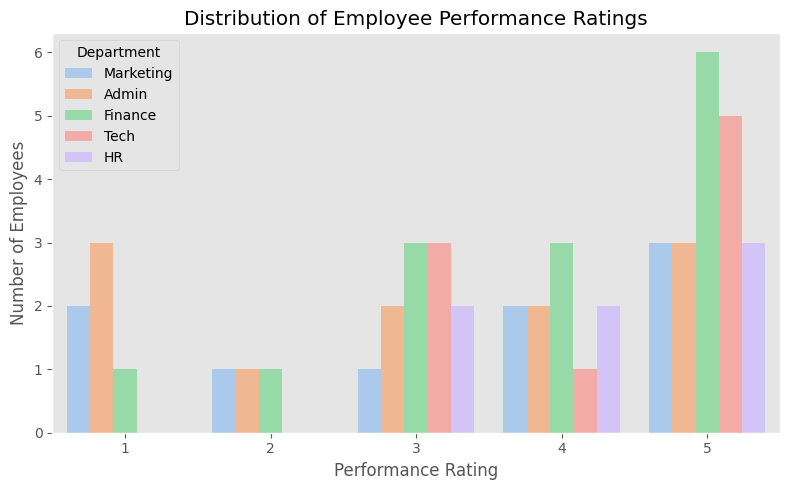

In [47]:
# Countplot of Performance_Rating.

plt.figure(figsize=(8, 5))
sns.countplot(x='Performance_Rating',  hue='Department', data=df, palette='pastel')

plt.xlabel("Performance Rating")
plt.ylabel("Number of Employees")
plt.title("Distribution of Employee Performance Ratings")
plt.grid(axis='y')
plt.tight_layout()

## 1. Rating 5:
### Finance: 6 employees
### Tech: 5 employees
### Admin, HR, Marketing: 3 each

## 2. Rating 4:
### Finance: 3 | HR & Marketing: 2 each | Admin: 2 | Tech: 1
### Rating 3:
### Finance & Tech: 3 each | Admin & HR: 2 each | Marketing: 1

## 3. Rating 2:
### Only Finance, Admin, and Marketing have 1 employee each

## 4. Rating 1:
### Admin: 3 | Marketing: 2 | Finance: 1

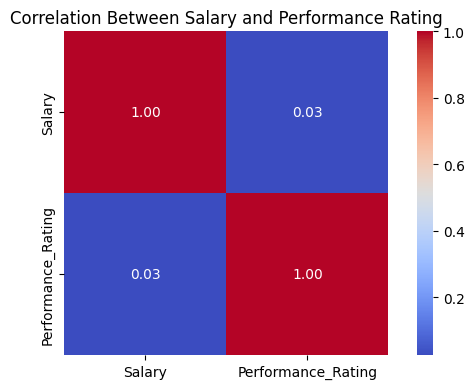

In [33]:
# Heatmap of correlation between numeric features (Salary, Performance_Rating).


numeric_df = df[['Salary', 'Performance_Rating']]

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)

plt.title("Correlation Between Salary and Performance Rating")
plt.tight_layout()


### 1. Correlation Coefficient between Salary & Performance Rating: 0.03
### 2. Indicates almost no relationship between how much employees earn and how well they are rated.
### 3. Implication: Performance ratings do not significantly influence salary in this organization.

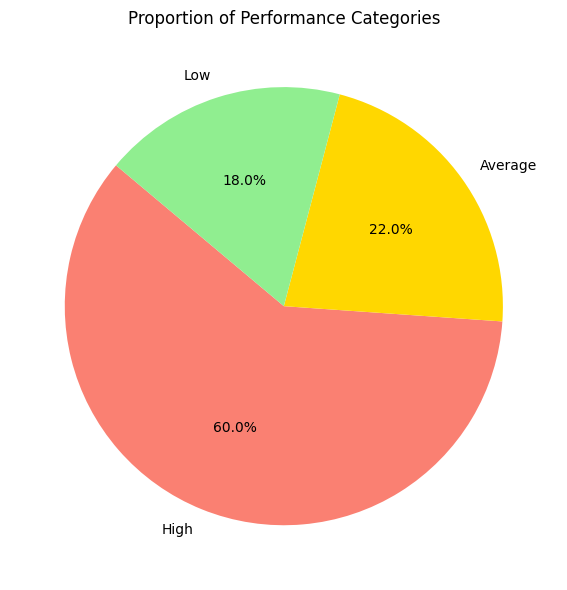

In [34]:
# Pie chart showing the proportion of high/medium/low performers.

# Count the categories
performance_counts = df['Performance_Category'].value_counts()

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    performance_counts,
    labels=performance_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=['salmon', 'gold', 'lightgreen']
)

plt.title("Proportion of Performance Categories")
plt.tight_layout()

### 1. 60% of employees are High performers, showing strong overall performance.
### 2. 22% are Average performers, indicating potential for growth.
### 3. 18% are Low performers, needing support or improvement.
### 4. High percentage of top ratings may suggest rating inflation.
### 5. Focus on developing 40% (Average + Low) and retaining top talent.